In [269]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path


In [471]:
tasks_metadata = {
    'acevedo_et_al_2020': {
        'task_name': 'White blood cell',
        'synthetic': False,
        'num_classes': 8,
        'submodality': 'BF',
        'taxonomy': 'Cell/organism/structure type identification'
    },
    'burgess_et_al_2024_contour': {
        'task_name': 'Cell contour',
        'synthetic': True,
        'num_classes': 3,
        'submodality': 'S',
        'taxonomy': 'cell texture and morphology profiling'
    },
    'burgess_et_al_2024_eccentricity': {
        'task_name': 'Cell eccentricity',
        'synthetic': True,
        'num_classes': 3,
        'submodality': 'S',
        'taxonomy': 'cell texture and morphology profiling'
    },
    'burgess_et_al_2024_texture': {
        'task_name': 'Cell texture',
        'synthetic': True,
        'num_classes': 3,
        'submodality': 'S',
        'taxonomy': 'cell texture and morphology profiling'
    },
    'empiar_sbfsem': {
        'task_name': 'Organisms and structures in EM',
        'synthetic': False,
        'num_classes': 5,
        'submodality': 'SBSEM',
        'taxonomy': 'Distinguish normal vs. abnormal'
    },
    'colocalization_benchmark': {
        'task_name': 'Molecule colocalization',
        'synthetic': True,
        'num_classes': 4,
        'submodality': 'S',
        'taxonomy': 'Single molecule imaging'
    },
    'eulenberg_et_al_2017_brightfield': {
        'task_name': 'Cell cycle phase',
        'synthetic': False,
        'num_classes': 7,
        'submodality': 'BF',
        'taxonomy': 'Cell cycle and stage identification'
    },
    'eulenberg_et_al_2017_darkfield': {
        'task_name': 'Cell cycle phase',
        'synthetic': False,
        'num_classes': 7,
        'submodality': 'DF',
        'taxonomy': 'Cell cycle and stage identification'
    },
    'eulenberg_et_al_2017_epifluorescence': {
        'task_name': 'Cell cycle phase',
        'synthetic': False,
        'num_classes': 5,
        'submodality': 'EF',
        'taxonomy': 'Cell cycle and stage identification'
    },
    'held_et_al_2010_galt': {
        'task_name': 'Golgi morphology',
        'synthetic': False,
        'num_classes': 8,
        'submodality': 'EF',
        'taxonomy': 'Cell cycle and stage identification'
    },
    'held_et_al_2010_h2b': {
        'task_name': 'Cell cycle phase with chromatin marker',
        'synthetic': False,
        'num_classes': 9,
        'submodality': 'EF',
        'taxonomy': 'Cell cycle and stage identification'
    },
    'held_et_al_2010_mt': {
        'task_name': 'Microtubule morphology',
        'synthetic': False,
        'num_classes': 6,
        'submodality': 'EF',
        'taxonomy': 'Cell cycle and stage identification'
    },
    'hussain_et_al_2019': {
        'task_name': 'Pre-cancerous and cervical cancer lesions',
        'synthetic': False,
        'num_classes': 4,
        'submodality': 'BF',
        'taxonomy': 'Interpretation of neoplastic histopathology'
    },
    'icpr2020_pollen': {
        'task_name': 'Pollen structures',
        'synthetic': False,
        'num_classes': 4,
        'submodality': 'BF',
        'taxonomy': 'Distinguish normal vs. abnormal'
    },
    'jung_et_al_2022': {
        'task_name': 'White blood cell',
        'synthetic': True,
        'num_classes': 5,
        'submodality': 'S',
        'taxonomy': 'Cell/organism/structure type identification'
    },
    'kather_et_al_2016': {
        'task_name': 'colorectal cancer texture [a]',
        'synthetic': False,
        'num_classes': 8,
        'submodality': 'BF',
        'taxonomy': 'Interpretation of neoplastic histopathology'
    },
    'kather_et_al_2018': {
        'task_name': 'colorectal cancer texture [b]',
        'synthetic': False,
        'num_classes': 8,
        'submodality': 'BF',
        'taxonomy': 'Interpretation of neoplastic histopathology'
    },
    'kather_et_al_2018_val7k': {
        'task_name': 'colorectal cancer texture [c]',
        'synthetic': False,
        'num_classes': 8,
        'submodality': 'BF',
        'taxonomy': 'Interpretation of neoplastic histopathology'
    },
    'nirschl_et_al_2018': {
        'task_name': 'clinical chronic heart failure',
        'synthetic': False,
        'num_classes': 2,
        'submodality': 'BF',
        'taxonomy': 'Interpretation of non-neoplastic histopathology'
    },
    'nirschl_unpub_fluorescence': {
        'task_name': 'organisms and labeled structure',
        'synthetic': False,
        'num_classes': 13,
        'submodality': 'TIRF',
        'taxonomy': 'Cell/organism/structure type identification'
    },
    'tang_et_al_2019': {
        'task_name': 'amyloid beta patterns [a]',
        'synthetic': False,
        'num_classes': 4,
        'submodality': 'BF',
        'taxonomy': 'Interpretation of non-neoplastic histopathology'
    },
    'wong_et_al_2022': {
        'task_name': 'amyloid beta patterns [b]',
        'synthetic': False,
        'num_classes': 4,
        'submodality': 'BF',
        'taxonomy': 'Interpretation of non-neoplastic histopathology'
    },
    'wu_et_al_2023': {
        'task_name': 'Mitochondrial morphology in electron microscopy',
        'synthetic': False,
        'num_classes': 2,
        'submodality': 'CET',
        'taxonomy': 'Distinguish normal vs. abnormal'
    }
}


def get_tasks_by_taxonomy(tasks_metadata,add_submodality = True):
    taxonomy_dict = {}
    
    for task in tasks_metadata.values():
        taxonomy = task['taxonomy']
        task_name = task['task_name']
        if add_submodality:
             task_name += " (" +  task["submodality"] + ")"


        #import pdb;pdb.set_trace()
        
        if taxonomy not in taxonomy_dict:
            taxonomy_dict[taxonomy] = []
        
        taxonomy_dict[taxonomy].append(task_name)
    
    return taxonomy_dict


In [472]:
#ROOT = "/pasteur/u/ale9806/Repositories/evlm"
#df_ii = pd.read_csv(f'{ROOT}/outputs/tables/eval.csv')
#df_c = pd.read_csv(f'{ROOT}/outputs/tables/evalclassification_0_classification_1.csv')
#df_c.drop(['level_0'], axis = 1, inplace = True) 

In [493]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def save_plot(plt,output_name:str):
    # Save the plot as PDF and PNG with 300 DPI
    pdf_path = f"plots/{output_name}.pdf"
    png_path = f"plots/{output_name}.png"
    plt.savefig(pdf_path, dpi=300)
    plt.savefig(png_path, dpi=300)
    plt.close()
    # Close the plot
    
def get_values_and_ci(df,mb100=True,order=None):
    

    # Separate values and errors
    for col in df.columns[1:]:
        df[[col + '_value', col + '_error']] = df[col].str.extract(r'([0-9.]+)\s*\((0\.[0-9]+)\)').astype(float)

    # Drop original columns with combined values and errors
    df.drop(columns=[col for col in df.columns if not col.endswith('_value') and not col.endswith('_error') and not col.endswith('model')], inplace=True)

    # Set index to 'model' for easier plotting
    df.set_index('model', inplace=True)

    # Transpose for plotting
    df_values = df[[col for col in df.columns if col.endswith('_value')]].transpose()
    df_errors = df[[col for col in df.columns if col.endswith('_error')]].transpose()
    df_values.index = df_values.index.str.replace('_value', '')
    df_errors.index = df_errors.index.str.replace('_error', '')
    if mb100:
        df_values = df_values*100
        df_errors = df_errors*100
        
    if order:
        print("ordering")
        df_values = df_values.reindex(order)
        df_errors = df_errors.reindex(order)
        
    return df_values,df_errors



## James's new code from here

In [494]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

def get_model_colors(verion=0):
    if verion==0:
        tab20_colors = plt.get_cmap('tab20').colors
        model_colors = {
            ## autoregressive generalist
            'CogVLM':"blue",
            'QwenVLM':"red",
            'PaliGemma':"orange",
            
            ## contrastive generalist
            'ALIGN': tab20_colors[8],
            'BLIP': tab20_colors[4],
            'OpenCLIP':tab20_colors[0],
            "CLIP":tab20_colors[6],
        
            ## specialist 
            'BioMedCLIP': 'lightblue',
            'QuiltCLIP': '#FFB6C1',
            'PLIP': '#FF69B4',
            'ConchCLIP': '#DDA0DD',
            
            ## random
            "Random":"gray",
        }
    else:
        raise ValueError()
        
    return model_colors 


### do the plotting
def plot_bars(df_values_sorted, df_errors_sorted, model_colors, figsize=(7,8), bar_width = 0.1, group_gap = 0.2, 
              hatch_these_models = ['QwenVLM', 'CogVLM', 'PaliGemma'], hatch_pattern = '////',
             xlabel='Accuracy', ylabel='Instance Identification'):
    
    index_names = df_values_sorted.index.values
    models = df_values_sorted.columns
    num_models = len(models)  
    
    # y positions for each index group
    y_pos = np.arange(len(index_names)) * (num_models * bar_width + group_gap)

    f, ax = plt.subplots(figsize=figsize)
    
    # Iterate over each index and plot the bars
    for i, index in enumerate(index_names):
        values = df_values_sorted.loc[index]
        errors = df_errors_sorted.loc[index]
        
        for j, model in enumerate(models):
            bar_position = y_pos[i] - (num_models / 2 - j) * bar_width
            hatch = hatch_pattern if model in hatch_these_models else ''
            ax.barh(bar_position, values[model], height=bar_width, xerr=errors[model], 
                     capsize=2, color=model_colors[model], label=model if i == 0 else "", edgecolor='white', hatch=hatch)
    ax.set_yticks(y_pos, index_names)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    return f, ax

# define groups for hatch and for the legend 
def generate_legend(model_colors, hatch_these_models = ['QwenVLM', 'CogVLM', 'PaliGemma'], 
                    hatch_pattern = '////'):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches

    groups = {
        "Autoregressive Generalist": ['QwenVLM', 'CogVLM', 'PaliGemma'],
        "Contrastive Generalist": ['ALIGN', 'OpenCLIP', 'CLIP', 'BLIP'],
        "Contrastive Specialist": ['BioMedCLIP', 'ConchCLIP', 'PLIP', 'QuiltCLIP'],
        "Random": ["Random"],
    }
    # Legend
    hatch_pattern = '///'
    legend_handles = {}
    for group_name, group_models in groups.items():
        handles = []
        for model in group_models:
            color = model_colors[model]
            hatch = hatch_pattern if model in hatch_these_models else ''
            handle = mpatches.Patch(facecolor=color, edgecolor='white', hatch=hatch, label=model)
            handles.append(handle)
        legend_handles[group_name] = handles
    
    # Create a separate plot for each group legend
    figures = []
    for group_name, handles in legend_handles.items():
        fig, ax = plt.subplots(figsize=(5, 1))  # Adjust the figure size for better rendering
        legend = ax.legend(handles=handles, title=group_name, loc='center', bbox_to_anchor=(0.5, 0.5), bbox_transform=fig.transFigure, ncol=1)
        for text in legend.get_texts():
            text.set_fontsize(12)
        ax.axis('off')  # Hide the axes
        figures.append(fig)
        plt.close()
    return figures


ordering


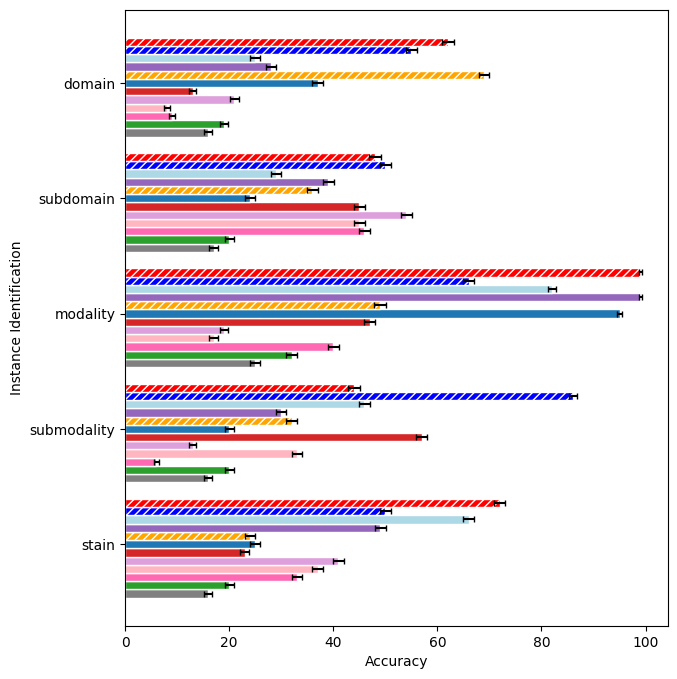

,model,domain,modality,stain,subdomain,submodality
0,QwenVLM,0.39 (0.007501549907005578),0.72 (0.006881587104773712),0.46 (0.008028428533824683),0.56 (0.007563546187228765),0.36 (0.007194668319900788)
1,Random_model,0.17 (0.005765654060756353),0.25 (0.006757594544327339),0.17 (0.00592261121347723),0.17 (0.0060136391816491),0.16 (0.0055796652200867936)
2,CLIP,0.14 (0.005393676379417234),0.53 (0.007873527588344698),0.27 (0.007041326664911807),0.44 (0.007501549907005578),0.38 (0.007501549907005578)
3,PaliGemma,0.6 (0.007563546187228765),0.43 (0.007687538747675138),0.2 (0.0063832587523032225),0.36 (0.007315561066336018),0.22 (0.006137631742095473)
4,CogVLM,0.46 (0.007625542467451951),0.62 (0.007563546187228765),0.36 (0.0075677809949987185),0.54 (0.007687538747675138),0.62 (0.007749535027898324)
5,ALIGN,0.31 (0.007253564786112832),0.75 (0.006633601983881077),0.44 (0.007962621742563847),0.32 (0.007005579665220085),0.22 (0.006447613143211406)
6,BLIP,0.19 (0.0058896466212027265),0.32 (0.007129572225666458),0.19 (0.006317451961042386),0.2 (0.006137631742095473),0.2 (0.006137631742095473)
7,OpenCLIP,0.27 (0.007005579665220085),0.81 (0.0060136391816491),0.29 (0.007370360621216154),0.32 (0.007129572225666458),0.12 (0.005083694978301301)
8,QuiltCLIP,0.06 (0.0037197768133911957),0.39 (0.007377557346559205),0.36 (0.007567780994998663),0.32 (0.007129572225666458),0.2 (0.0061996280223186595)
9,PLIP,0.17 (0.0060136391816491),0.53 (0.007749535027898324),0.26 (0.007041326664911862),0.44 (0.007873527588344698),0.14 (0.005331680099194047)


In [495]:
# df_ii = pd.read_csv(f'{ROOT}/outputs/tables/eval.csv')
# df_c = pd.read_csv(f'{ROOT}/outputs/tables/evalclassification_0_classification_1.csv')
# df_c.drop(['level_0'], axis = 1, inplace = True) 
## get the values for the 
# Sample data
#df = pd.read_csv(f'{ROOT}/outputs/tables/eval.csv')
df = pd.read_csv(f'{ROOT}/outputs/tables/eval_modality_light_microscopy_domain_pathology.csv')
df_values,df_errors =  get_values_and_ci(df,order=['stain','submodality','modality','subdomain','domain'])

# Assuming df_values is your DataFrame
mean_values = df_values.mean(axis=0)  # Calculate the mean along the columns
sorted_mean_values = mean_values.sort_values(ascending=False)  # Sort in descending order
df_values = df_values.reindex(columns=sorted_mean_values.index)
#df_values.reindex(['stain','submodality','modality','subdomain','domain'])


df_values.columns = [(c if c!='Random_model' else "Random") for c in df_values.columns ]
df_errors.columns = [(c if c!='Random_model' else "Random") for c in df_errors.columns ]
mean_values = df_values.mean(axis=0)  # Calculate the mean along the columns
sorted_mean_values = mean_values.sort_values(ascending=True)
# Reorder the DataFrames based on the sorted mean values
df_values_sorted = df_values[sorted_mean_values.index]
df_errors_sorted = df_errors[sorted_mean_values.index]

model_colors = get_model_colors()
f, ax = plot_bars(df_values_sorted, df_errors_sorted, model_colors=model_colors)
plt.show()
df_ii

In [496]:

base_model = "CLIP"
fine_tuned_model = "ConchCLIP"
tab20_colors = plt.get_cmap('tab20').colors
colors = [tab20_colors[4],tab20_colors[3],tab20_colors[2],tab20_colors[1],tab20_colors[0]]


def plot_diff(df,base_model,fine_tuned_model,colors,filename):
    df_values_diff = df[fine_tuned_model] - df_values[base_model] 
    #df_values_diff = df_values_diff.reindex(['stain','submodality','modality','subdomain','domain'])
    df_values_diff.plot(kind='barh',color=colors)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.3)
    plt.axvline(x=df_values_diff.mean(), color='black', linestyle='--', linewidth=1)
    plt.xlim(-60,60)
    plt.title(f"Mean Difference:{np.round(df_values_diff.mean(),2)}")
    plt.tight_layout()
    
    save_plot(plt,output_name=f"{filename}_{fine_tuned_model}_minus_{base_model}")
    plt.show()

In [497]:
for (base_model,fine_tuned_model) in ("CLIP","PLIP"),("CLIP","QuiltCLIP"),("OpenCLIP","BioMedCLIP"):
    plot_diff(df_values,base_model,fine_tuned_model,colors,filename="identification")

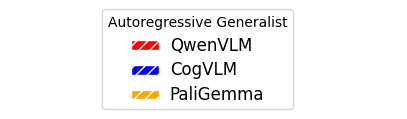

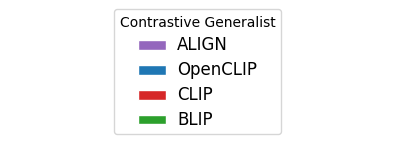

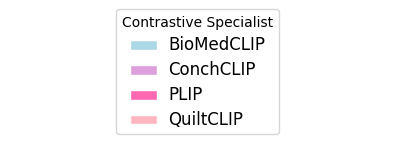

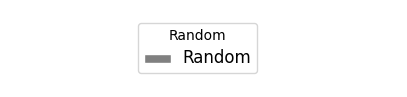

In [498]:
figures = generate_legend(model_colors, hatch_these_models = ['QwenVLM', 'CogVLM', 'PaliGemma'], 
                    hatch_pattern = '////')
for figure in figures:
    display(figure)

In [499]:
groups = get_tasks_by_taxonomy(tasks_metadata)
order = groups['cell texture and morphology profiling'] \
      + groups['Cell/organism/structure type identification'] \
      + groups['Cell cycle and stage identification'] \
      +  groups['Distinguish normal vs. abnormal'] \
      + groups['Single molecule imaging']  \
      + groups['Interpretation of neoplastic histopathology'] \
      +groups['Interpretation of non-neoplastic histopathology']

ordering


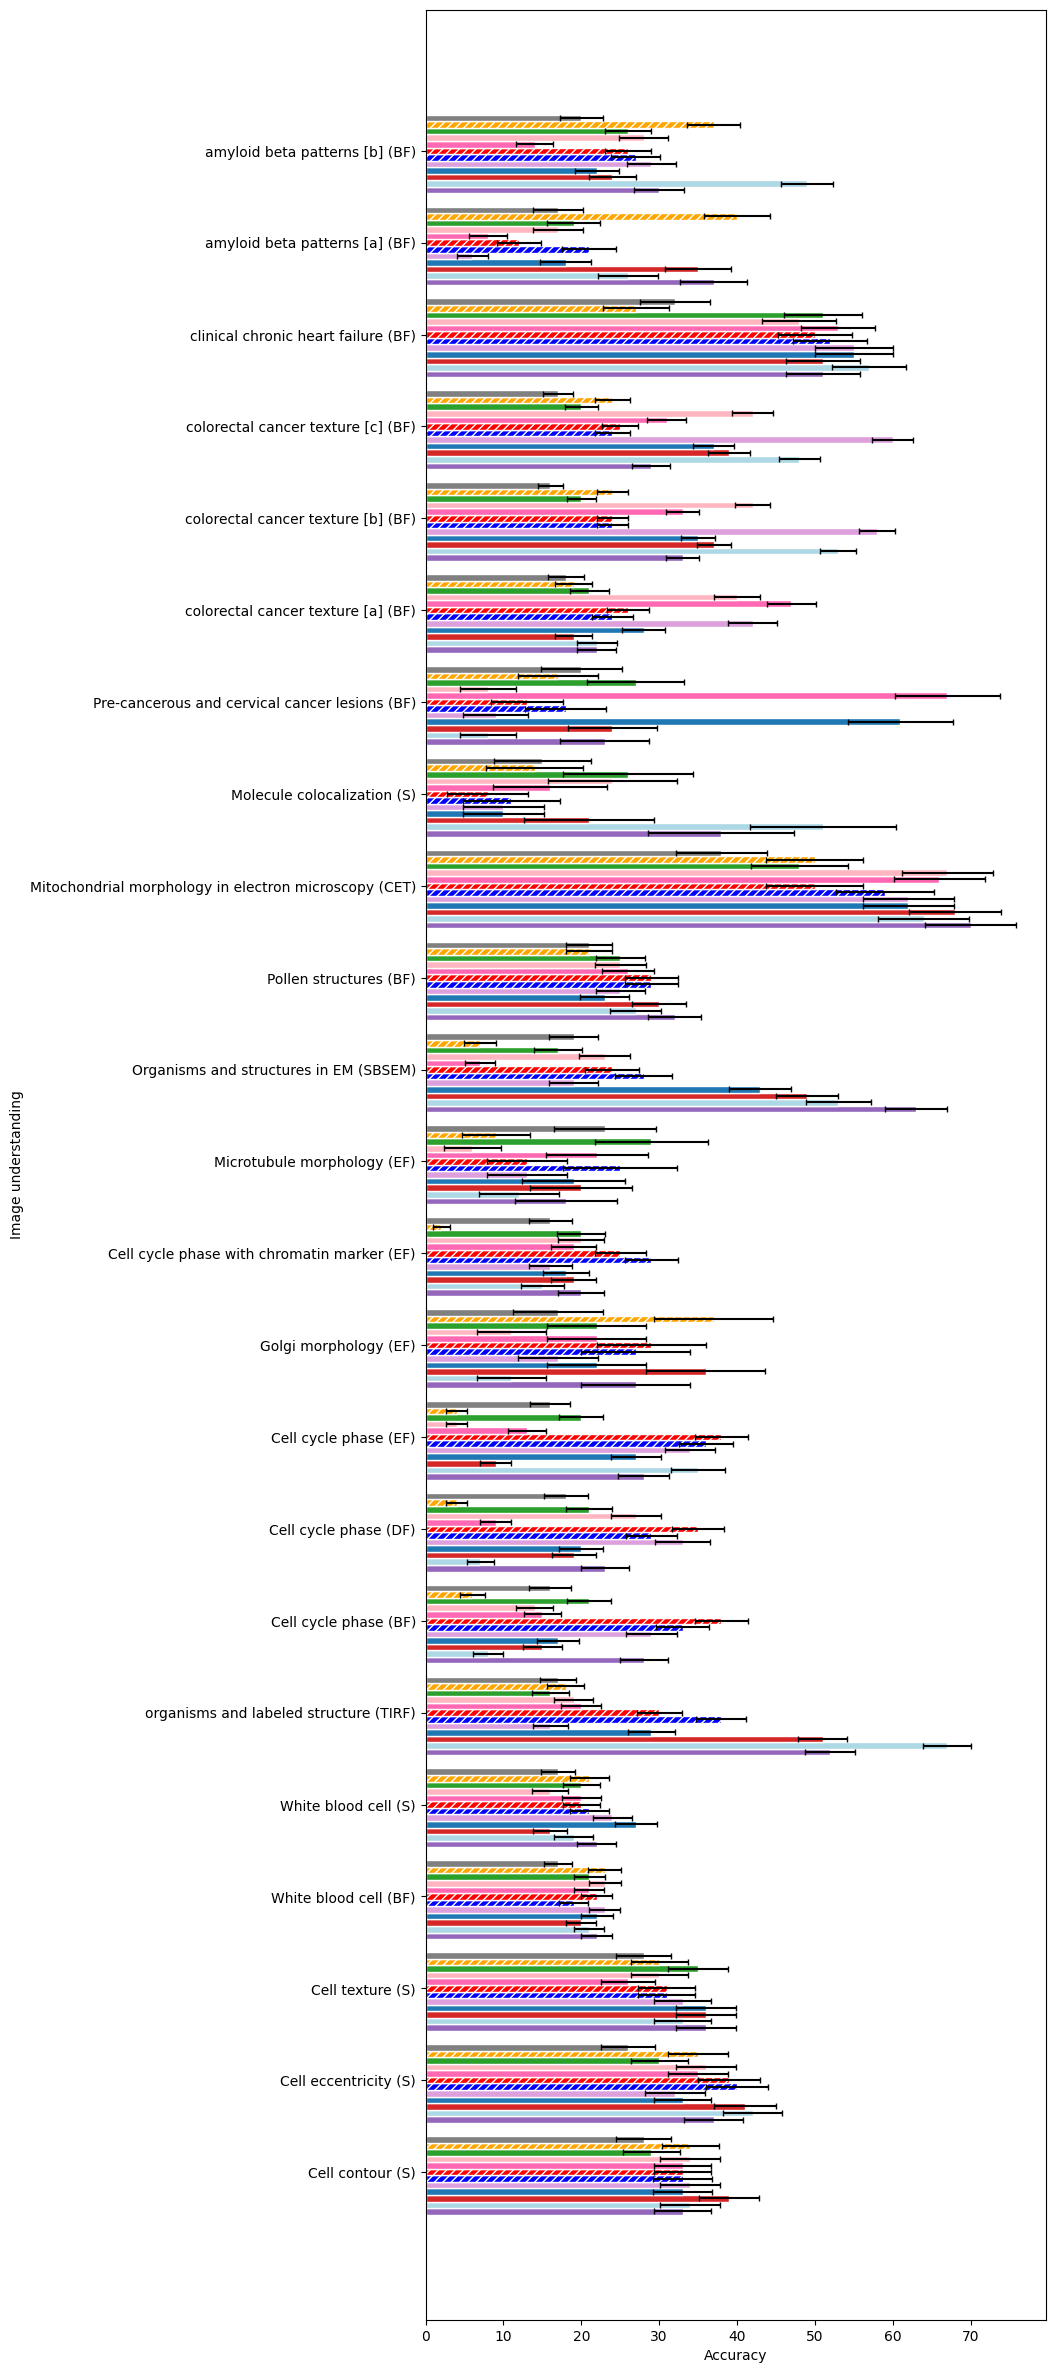

In [500]:
# Sample data
df = pd.read_csv(f'{ROOT}/outputs/tables/evalclassification_1.csv')
#df = pd.read_csv(f'{ROOT}/outputs/tables/eval_modality_light_microscopy_domain_pathologyclassification_1.csv')

df.drop(['level_0'], axis = 1, inplace = True) 
df_values,df_errors =  get_values_and_ci(df,order=order)
df_values.columns = [(c if c!='Random_model' else "Random") for c in df_values.columns ]
df_errors.columns = [(c if c!='Random_model' else "Random") for c in df_errors.columns ]

#df_values = df[order]
# Assuming df_values is your DataFrame
mean_values = df_values.mean(axis=0)  # Calculate the mean along the columns
sorted_mean_values = mean_values.sort_values(ascending=False)  # Sort in descending order
df_values_sorted = df_values[sorted_mean_values.index]
df_errors_sorted = df_errors[sorted_mean_values.index]
##
model_colors = get_model_colors()
f, ax = plot_bars(df_values_sorted, df_errors_sorted, model_colors=model_colors, xlabel='Accuracy', ylabel='Image understanding',
                 figsize=(8,30))
plt.show()



In [501]:
#import pandas as pd

# Assuming df_values is your DataFrame
#mean_values = df_values.mean(axis=0)  # Calculate the mean along the columns
#sorted_mean_values = mean_values.sort_values(ascending=False)  # Sort in descending order
#print(sorted_mean_values)

In [502]:
task_colors = {'Cell/organism/structure type identification':"tab:blue",
               'cell texture and morphology profiling':"tab:red",
               'Distinguish normal vs. abnormal':"tab:green",
               'Single molecule imaging':"tab:orange",
               'Cell cycle and stage identification':"tab:olive",
               'Interpretation of neoplastic histopathology':"tab:pink",
               'Interpretation of non-neoplastic histopathology':"tab:purple"}
individual_task_colors = []
for group,tasks in groups.items():
    for _ in tasks:
        individual_task_colors.append(task_colors[group])
    
individual_task_colors.append("tab:purple")
for (base_model,fine_tuned_model) in ("CLIP","PLIP"),("CLIP","QuiltCLIP"),("OpenCLIP","BioMedCLIP"):
    plot_diff(df_values,base_model,fine_tuned_model,individual_task_colors,filename="classification")


In [503]:
df_values

,ALIGN,BLIP,BioMedCLIP,CLIP,CogVLM,ConchCLIP,OpenCLIP,PLIP,PaliGemma,QuiltCLIP,QwenVLM,Random
Cell contour (S),33.0,29.0,34.0,39.0,33.0,34.0,33.0,33.0,34.0,34.0,33.0,28.0
Cell eccentricity (S),37.0,30.0,42.0,41.0,40.0,32.0,33.0,35.0,35.0,36.0,39.0,26.0
Cell texture (S),36.0,35.0,33.0,36.0,31.0,33.0,36.0,26.0,30.0,30.0,31.0,28.0
White blood cell (BF),22.0,21.0,21.0,20.0,19.0,23.0,22.0,21.0,23.0,23.0,22.0,17.0
White blood cell (S),22.0,20.0,19.0,16.0,21.0,24.0,27.0,20.0,21.0,16.0,20.0,17.0
organisms and labeled structure (TIRF),52.0,16.0,67.0,51.0,38.0,16.0,29.0,20.0,18.0,19.0,30.0,17.0
Cell cycle phase (BF),28.0,21.0,8.0,15.0,33.0,29.0,17.0,15.0,6.0,14.0,38.0,16.0
Cell cycle phase (DF),23.0,21.0,7.0,19.0,29.0,33.0,20.0,9.0,4.0,27.0,35.0,18.0
Cell cycle phase (EF),28.0,20.0,35.0,9.0,36.0,34.0,27.0,13.0,4.0,4.0,38.0,16.0
Golgi morphology (EF),27.0,22.0,11.0,36.0,27.0,17.0,22.0,22.0,37.0,11.0,29.0,17.0


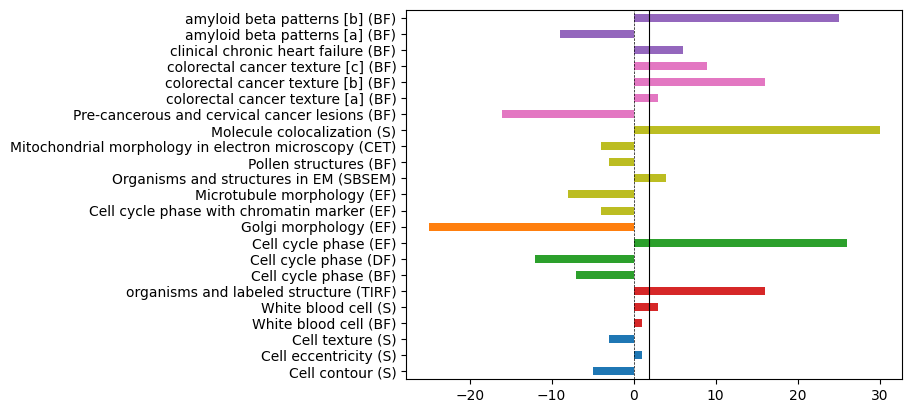

In [504]:
x_model = "CLIP"
y_model = "BioMedCLIP"
df_values_diff = df_values[y_model] - df_values[x_model] 
df_values_diff.plot(kind='barh',color=individual_task_colors)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=df_values_diff.mean(), color='black', linestyle='-', linewidth=0.8)


In [505]:
for groups.keys()

SyntaxError: cannot assign to function call (2505140386.py, line 1)

In [231]:
df_values_diff.index

Index(['Cell contour (S)', 'Cell eccentricity (S)', 'Cell texture (S)',
       'White blood cell (BF)', 'White blood cell (S)',
       'organisms and labeled structure (TIRF)', 'Cell cycle phase (BF)',
       'Cell cycle phase (DF)', 'Cell cycle phase (EF)',
       'Golgi morphology (EF)', 'Cell cycle phase with chromatin marker (EF)',
       'Microtubule morphology (EF)', 'Organisms and structures in EM (SBSEM)',
       'Pollen structures (BF)',
       'Mitochondrial morphology in electron microscopy (CET)',
       'Molecule colocalization patterns (S)',
       'Pre-cancerous and cervical cancer lesions (BF)',
       'colorectal cancer texture [a] (BF)',
       'colorectal cancer texture [b] (BF)',
       'colorectal cancer texture [c] (BF)',
       'clinical chronic heart failure (BF)',
       'amyloid beta morphology patterns [a] (BF)',
       'amyloid beta morphology patterns [b] (BF)'],
      dtype='object')